In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
import mglearn

# Supervised Machine Learning Algorithms

In [3]:
X, y = mglearn.datasets.make_forge()

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


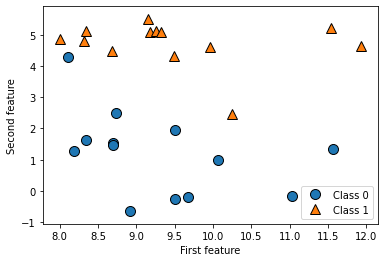

In [4]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0','Class 1'])
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape:', X.shape)

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, 'Target')

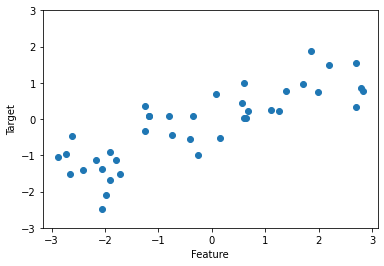

In [6]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [7]:
# 유방암 종양의 임상 데이터 위스콘신(Wisconsin Breast Cancer)

from sklearn.datasets import load_breast_cancer

In [8]:
cancer = load_breast_cancer()
print('cancer.keys():', cancer.keys())

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
print('Shape of cancer data:', cancer.data.shape)

Shape of cancer data: (569, 30)


In [10]:
print('Sample counts per class:\n',
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


### References

- [train_test_split 모듈을 활용하여 학습과 테스트 세트 분리](https://teddylee777.github.io/scikit-learn/train-test-split)
- [구조의 재배열, numpy.reshape 함수](https://yganalyst.github.io/data_handling/memo_5/)
- [내장 함수 zip 사용법](https://www.daleseo.com/python-zip/)
- [bincount](https://nurilee.com/2020/05/10/bincount-%EB%9E%80/)

In [11]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
print('Feature names:\n', cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
# 보스턴 주택 가격

from sklearn.datasets import load_boston

In [14]:
boston = load_boston()
print('Data shape:', boston.data.shape)

Data shape: (506, 13)


In [15]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## k-Nearest Neighbors

k-Neighbors classification

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


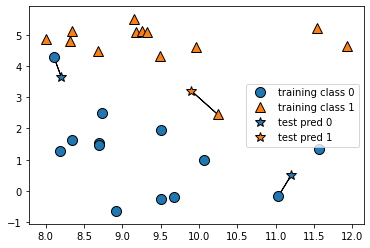

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


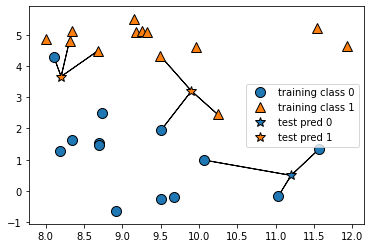

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [18]:
X, y = mglearn.datasets.make_forge()

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clf = KNeighborsClassifier(n_neighbors=3) # hyperparameter

In [23]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
print('Test set predictions:', clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [25]:
print('Test set accuracy:', clf.score(X_test, y_test))

Test set accuracy: 0.8571428571428571


## Analyzing KNeighborsClassifier

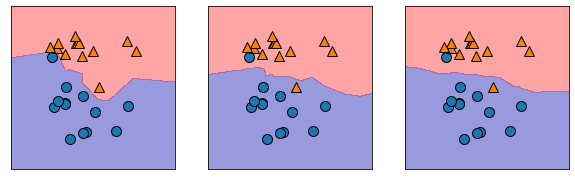

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

In [37]:
test = load_breast_cancer()

In [40]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

In [41]:
for n_neighbors in neighbors_settings:
    print(n_neighbors)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

1
2
3
4
5
6
7
8
9
10


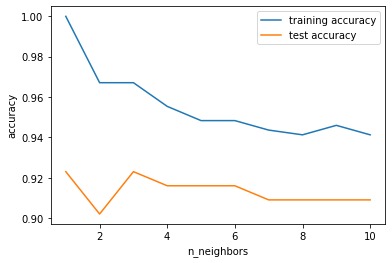

In [44]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy') # 주목
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

## k-neighbors regression

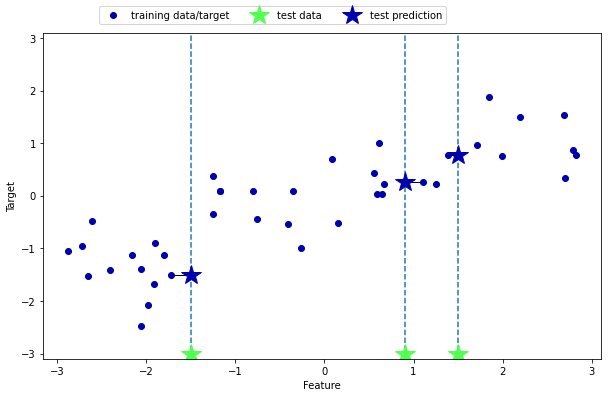

In [45]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

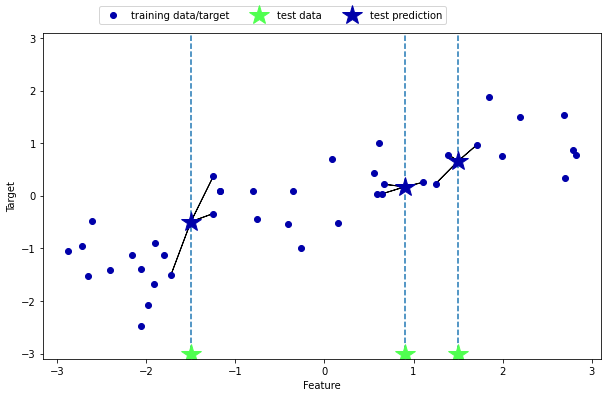

In [46]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [49]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [50]:
reg.score(X_test, y_test)

0.8344172446249605